In [ ]:
pip install pbs
pip install gensim
pip install smart_open
pip install boto
pip install boto3
pip install botocore
pip install jmespath
pip install nltk
pip install wordcloud

In [1]:
#Bring in plotting first, and ensure proper backend for linux
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#Set up in-line plotting for ipython
%matplotlib inline

In [3]:
import gensim, os, re, string, time, sys, pickle, gc, io, json
import numpy as np
import pandas as pd
import datetime as dt

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from gensim.models import LdaModel
from gensim import corpora
from gensim.models.phrases import Phrases, Phraser

In [4]:
sys.path.append('./lib/python3.7/site-packages')

In [5]:
sys.path.append('C:/Users/conne_0hfce1v/Downloads/nltk-3.8.1.zip')

In [6]:
import nltk

In [ ]:
nltk.download()

In [7]:
from nltk.corpus import twitter_samples

In [8]:
twitter_samples.fileids()

['negative_tweets.json', 'positive_tweets.json', 'tweets.20150430-223406.json']

In [9]:
twitter_samples.strings('tweets.20150430-223406.json')

['RT @KirkKus: Indirect cost of the UK being in the EU is estimated to be costing Britain £170 billion per year! #BetterOffOut #UKIP',
 'VIDEO: Sturgeon on post-election deals http://t.co/BTJwrpbmOY',
 'RT @LabourEoin: The economy was growing 3 times faster on the day David Cameron became Prime Minister than it is today.. #BBCqt http://t.co…',
 'RT @GregLauder: the UKIP east lothian candidate looks about 16 and still has an msn addy http://t.co/7eIU0c5Fm1',
 "RT @thesundaypeople: UKIP's housing spokesman rakes in £800k in housing benefit from migrants.  http://t.co/GVwb9Rcb4w http://t.co/c1AZxcLh…",
 'RT @Nigel_Farage: Make sure you tune in to #AskNigelFarage tonight on BBC 1 at 22:50! #UKIP http://t.co/ogHSc2Rsr2',
 'RT @joannetallis: Ed Milliband is an embarrassment. Would you want him representing the UK?!  #bbcqt vote @Conservatives',
 "RT @abstex: The FT is backing the Tories. On an unrelated note, here's a photo of FT leader writer Jonathan Ford (next to Boris) http://t.c…",
 "RT

In [10]:
from nltk.corpus import twitter_samples
from nltk.tag import pos_tag_sents

tweets = twitter_samples.strings('positive_tweets.json')
tweets_tokens = twitter_samples.tokenized('positive_tweets.json')
tweets_tagged = pos_tag_sents(tweets_tokens)

JJ_count = 0
NN_count = 0

for tweet in tweets_tagged:
    for pair in tweet:
        tag = pair[1]
        if tag == 'JJ':
            JJ_count += 1
        elif tag == 'NN':
            NN_count += 1
            
print('Total number of adjectives = ', JJ_count)
print('Total number of nouns = ', NN_count)

Total number of adjectives =  6091
Total number of nouns =  13181


In [11]:
nltk.data.path.append("C:/Users/conne_0hfce1v/OneDrive/Desktop/NLP/nltk_data")

In [12]:
from nltk.stem.snowball import SnowballStemmer
from nltk.tag import StanfordPOSTagger
from nltk.tag import StanfordNERTagger
from nltk.parse import stanford
from gensim.models import Phrases
from nltk.stem import WordNetLemmatizer
sentTokenizer = nltk.sent_tokenize
lemmatizer = WordNetLemmatizer()
from nltk.sentiment.vader import SentimentIntensityAnalyzer as sia
from wordcloud import WordCloud

In [13]:
np.random.seed(0)

In [14]:
print(os.getcwd())

C:\Users\conne_0hfce1v


In [15]:
import re, string, nltk, gensim

In [16]:
import numpy as np

In [17]:
from nltk.stem.snowball import SnowballStemmer

In [18]:
# 1. Open the CSV file in reading mode and the TXT file in writing mode
import csv
with open(r'C:\Users\conne_0hfce1v\OneDrive\Desktop\NLP\ModelData\sampleDatafb.csv', 'r') as f_in, open(r'C:\Users\conne_0hfce1v\OneDrive\Desktop\NLP\ModelData\my_file.txt', 'w') as f_out:

    # 2. Read the CSV file and store in variable
    content = f_in.read()

    # 3. Write the content into the TXT file
    f_out.write(content)

In [19]:
nltk.data.path.append("C:/Users/conne_0hfce1v/OneDrive/Desktop/NLP/nltk_data")

In [20]:
punctuation=set(string.punctuation)
stopWordsPath="C:/Users/conne_0hfce1v/OneDrive/Desktop/NLP/ModelData/stopwords.txt"
with open(stopWordsPath) as file:
    file_contents=file.read()
stopwords=file_contents.split('\n')
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that ', 'these', 'am', 'is', 'are ', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and ', 'but', 'if', 'or', 'because', 'as ', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into ', 'through', 'during', 'before ', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then ', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now', 'd', 'll

In [21]:
from nltk.stem.snowball import SnowballStemmer
tokenizer=nltk.word_tokenize
sentTokenizer = nltk.sent_tokenize
stemmer = SnowballStemmer("english")

In [22]:
root=r'C:/Users/conne_0hfce1v/OneDrive/Desktop/NLP/ModelData/Data'
fileList=[os.path.join(path,name) for path, subdirs, files in os.walk(root) for name in files]
fileList

['C:/Users/conne_0hfce1v/OneDrive/Desktop/NLP/ModelData/Data\\my_file.txt']

In [23]:
textDict={}
for x in fileList:
     with open(x,encoding='ISO-8859-1') as f:
            textDict[x]=f.read()

In [24]:
rawDF=pd.DataFrame.from_dict(textDict,orient='index')
rawDF.reset_index(inplace=True)
rawDF.columns=['pk','rawText']

In [25]:
swDict={x:' ' for x in stopwords}
swStemDict={stemmer.stem(x):' ' for x in stopwords}

In [26]:
#Define stopword search function
def swSearch(x,stem=False):
    if stem:
        try:
            return swStemDict[x]
        except KeyError:
            return x
    else:
        try:
            return swDict[x]
        except KeyError:
            return x

In [27]:
#Convert text file into list of tokens
def getTokens(rawData,removeStopwords=True,stem=True):
    #Extract raw text and update for encoding issues
    #Clean string and remove punctuation
    rawData="".join([c if c not in punctuation else ' ' for c in rawData])
    textList=tokenizer(rawData)
    tokenList=[str(x) for x in textList]
    
    #Create tokens
    #Convert all words to lowercase
    textList=[word.lower() for word in tokenList]
    
    #Stem if == True
    if stem:
        textList=[stemmer.stem(word) for word in textList]
        
    #convert digits into NUM
    textList=[re.sub("\d+"," NUM", word) for word in textList]
    
    
    #remove stopwords if true
    if removeStopwords:
        textList=[swSearch(x,stem=stem) for x in textList]
        
    #Remove blanks
    textList=[word for word in textList if word !=' ' and word!='NUM']
    
    #Extract tokens
    return(textList)

In [28]:
def cleanStr(x):
    try:
        xList=x.split(' ')
    except:
        xList=str(x).split(' ')
    for i,x in enumerate(xList):
        try:
            xList[i]=str(x)
        except:
            xList[i]=''
    resultString=' '.join(xList)
    for x in ['/n','\x07','\x0c','\x013','\x92','\x96','\n','\x94']:
        resultString=resultString.replace(x,'')
    resultString=re.sub(' +',' ',resultString)
    return resultString

In [29]:
#Convert Messages into list of sentences
startTime=time.time()
rawDF['sentences']=rawDF['rawText'].map(lambda x: sentTokenizer(cleanStr(x)))

print('Runtime in %.2f seconds'%(time.time()-startTime))

Runtime in 1.02 seconds


In [30]:
#Review Data 
for x in rawDF['sentences'].head(5):
    print(x)
    print(len(x))

[',Situation,emotion,empathetic_dialogues,labels,,0,"I remember going to the fireworks with my best friend.', 'There was a lot of people, but it only felt like us in the world.', '",sentimental,"Customer :I remember going to see the fireworks with my best friend.', 'It was the first time we ever spent time alone together.', 'Although there was a lot of people, we felt like the only people in the world.Agent :","Was this a friend you were in love with, or just a best friend?', '",,1,"I remember going to the fireworks with my best friend.', 'There was a lot of people, but it only felt like us in the world.', '",sentimental,"Customer :This was a best friend.', 'I miss her.Agent :",Where has she gone?,,2,"I remember going to the fireworks with my best friend.', 'There was a lot of people, but it only felt like us in the world.', '",sentimental,"Customer :We no longer talk.Agent :",Oh was this something that happened because of an argument?,,3,"I remember going to the fireworks with my best

In [31]:
#Create dictionary of surveyId and sentences
xDict=rawDF[['pk','sentences']].set_index('pk').to_dict()['sentences']
print(len(xDict.keys()))
print(len(rawDF))

1
1


In [32]:
#Create dataframe
sentDF=pd.DataFrame([[str(k)+'~'+str(i),x] for k,v in xDict.items() for i,x in enumerate(v)],columns=['pk','sentence'])
print(len(sentDF))
sentDF.drop_duplicates(inplace=True)
print(len(sentDF))
sentDF.reset_index(inplace=True,drop=True)

7817
7817


In [33]:
#Reviewing resuting output
sentDF.head(10)

,pk,sentence
0,C:/Users/conne_0hfce1v/OneDrive/Desktop/NLP/Mo...,",Situation,emotion,empathetic_dialogues,labels..."
1,C:/Users/conne_0hfce1v/OneDrive/Desktop/NLP/Mo...,"There was a lot of people, but it only felt li..."
2,C:/Users/conne_0hfce1v/OneDrive/Desktop/NLP/Mo...,""",sentimental,""Customer :I remember going to s..."
3,C:/Users/conne_0hfce1v/OneDrive/Desktop/NLP/Mo...,It was the first time we ever spent time alone...
4,C:/Users/conne_0hfce1v/OneDrive/Desktop/NLP/Mo...,"Although there was a lot of people, we felt li..."
5,C:/Users/conne_0hfce1v/OneDrive/Desktop/NLP/Mo...,""",,1,""I remember going to the fireworks with m..."
6,C:/Users/conne_0hfce1v/OneDrive/Desktop/NLP/Mo...,"There was a lot of people, but it only felt li..."
7,C:/Users/conne_0hfce1v/OneDrive/Desktop/NLP/Mo...,""",sentimental,""Customer :This was a best friend."
8,C:/Users/conne_0hfce1v/OneDrive/Desktop/NLP/Mo...,"I miss her.Agent :"",Where has she gone?,,2,""I ..."
9,C:/Users/conne_0hfce1v/OneDrive/Desktop/NLP/Mo...,"There was a lot of people, but it only felt li..."


In [34]:
#Tokenize text
startTime=time.time()
sentDF['tokens']=sentDF['sentence'].map(lambda x: getTokens(cleanStr(x),removeStopwords=True,stem=False))
print(sentDF.head(10))
print('Runtime in %.2f seconds'%(time.time()-startTime))

                                                  pk  \
0  C:/Users/conne_0hfce1v/OneDrive/Desktop/NLP/Mo...   
1  C:/Users/conne_0hfce1v/OneDrive/Desktop/NLP/Mo...   
2  C:/Users/conne_0hfce1v/OneDrive/Desktop/NLP/Mo...   
3  C:/Users/conne_0hfce1v/OneDrive/Desktop/NLP/Mo...   
4  C:/Users/conne_0hfce1v/OneDrive/Desktop/NLP/Mo...   
5  C:/Users/conne_0hfce1v/OneDrive/Desktop/NLP/Mo...   
6  C:/Users/conne_0hfce1v/OneDrive/Desktop/NLP/Mo...   
7  C:/Users/conne_0hfce1v/OneDrive/Desktop/NLP/Mo...   
8  C:/Users/conne_0hfce1v/OneDrive/Desktop/NLP/Mo...   
9  C:/Users/conne_0hfce1v/OneDrive/Desktop/NLP/Mo...   

                                            sentence  \
0  ,Situation,emotion,empathetic_dialogues,labels...   
1  There was a lot of people, but it only felt li...   
2  ",sentimental,"Customer :I remember going to s...   
3  It was the first time we ever spent time alone...   
4  Although there was a lot of people, we felt li...   
5  ",,1,"I remember going to the fireworks with

In [35]:
#delete rawDF
del xDict
gc.collect()

0

In [36]:
sentDF.head(20)

,pk,sentence,tokens
0,C:/Users/conne_0hfce1v/OneDrive/Desktop/NLP/Mo...,",Situation,emotion,empathetic_dialogues,labels...","[situation, emotion, empathetic, dialogues, la..."
1,C:/Users/conne_0hfce1v/OneDrive/Desktop/NLP/Mo...,"There was a lot of people, but it only felt li...","[lot, people, felt, like, us, world]"
2,C:/Users/conne_0hfce1v/OneDrive/Desktop/NLP/Mo...,""",sentimental,""Customer :I remember going to s...","[sentimental, customer, remember, going, see, ..."
3,C:/Users/conne_0hfce1v/OneDrive/Desktop/NLP/Mo...,It was the first time we ever spent time alone...,"[first, time, ever, spent, time, alone, together]"
4,C:/Users/conne_0hfce1v/OneDrive/Desktop/NLP/Mo...,"Although there was a lot of people, we felt li...","[although, lot, people, felt, like, people, wo..."
5,C:/Users/conne_0hfce1v/OneDrive/Desktop/NLP/Mo...,""",,1,""I remember going to the fireworks with m...","[ NUM, remember, going, fireworks, best, friend]"
6,C:/Users/conne_0hfce1v/OneDrive/Desktop/NLP/Mo...,"There was a lot of people, but it only felt li...","[lot, people, felt, like, us, world]"
7,C:/Users/conne_0hfce1v/OneDrive/Desktop/NLP/Mo...,""",sentimental,""Customer :This was a best friend.","[sentimental, customer, best, friend]"
8,C:/Users/conne_0hfce1v/OneDrive/Desktop/NLP/Mo...,"I miss her.Agent :"",Where has she gone?,,2,""I ...","[miss, agent, gone, NUM, remember, going, fir..."
9,C:/Users/conne_0hfce1v/OneDrive/Desktop/NLP/Mo...,"There was a lot of people, but it only felt li...","[lot, people, felt, like, us, world]"


In [37]:
#Remove short comments 
print(len(sentDF))
sentDF=sentDF[sentDF['tokens'].map(len)>=4]
sentDF.reset_index(inplace=True)
del sentDF['index']
print(len(sentDF))

7817
6706


In [38]:
#Create nGram function
def getNGrams(tokens,n):
    return ['_'.join(tokens[i:i+n]) for i in range(len(tokens)-n+1)]

In [39]:
#Tarin bgram transformer
from gensim.models.phrases import Phrases
bgTrans=Phraser(Phrases(sentDF['tokens'],min_count=10))

In [40]:
#Update with bigrams
sentDF['tokens']=sentDF['tokens'].map(lambda x: bgTrans[x])

In [41]:
wordcloudWords=' '.join([y for x in sentDF['tokens'].tolist() for y in x])
wordcloudWords[:20]

'situation emotion em'

In [42]:
#Generate word cloud 
wordcloud = WordCloud(width=800, height = 800, background_color='white', stopwords=stopwords, min_font_size=10).generate(wordcloudWords)

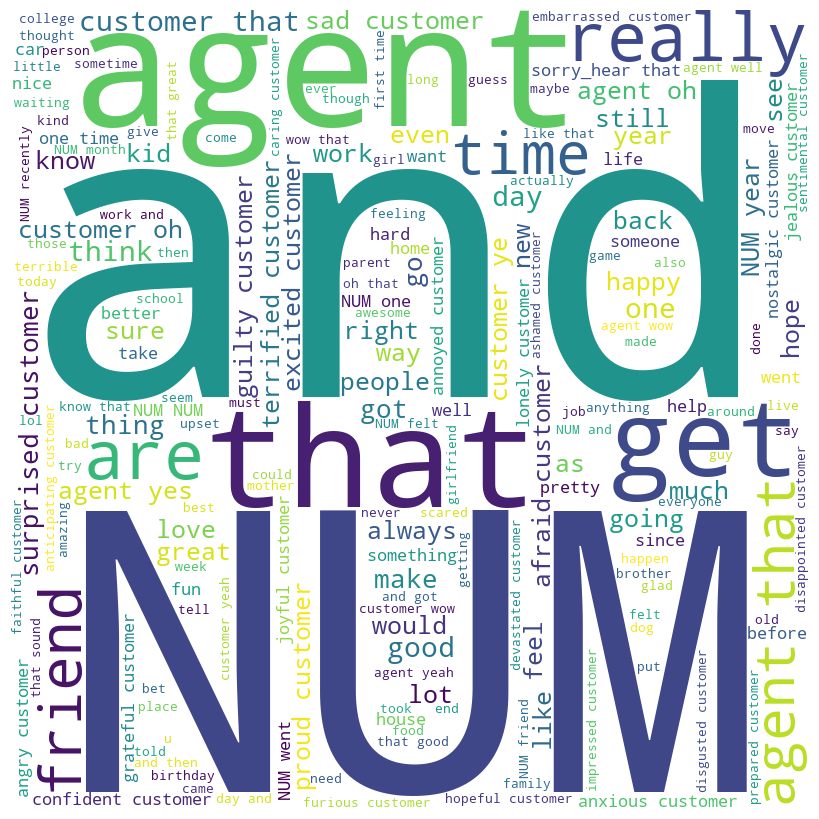

In [43]:
#Plot Wordcloud

plt.figure(figsize=(8,8),facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

In [44]:
#Get VOcab list 
vocabList=list(set([y for x in sentDF['tokens'].tolist() for y in x]))
print(len(vocabList))

4921


In [45]:
#Calculate docFrequency
dfDict={x:0 for x in vocabList}
for tokens in sentDF['tokens'].tolist():
    for token in set(tokens):
        dfDict[token]+=1

In [46]:
#Calculate wordFrequency
wfDict={x:0 for x in vocabList}
for tokens in sentDF['tokens'].tolist():
    for token in tokens:
        wfDict[token]+=1

In [47]:
#Convert dictionaries to pandas dataframes and plot word counts
docDF=pd.DataFrame.from_dict(dfDict,orient='index')
docDF.sort_values(by=[docDF.columns[0]],ascending=False,inplace=True)
docDF.reset_index(inplace=True)
docDF.columns=['token','count']
print(docDF.head())
print('='*125)
print(docDF.tail())
print('='*125)
wordDF=pd.DataFrame.from_dict(wfDict,orient='index')
wordDF.sort_values(by=[wordDF.columns[0]],ascending=False,inplace=True)
wordDF.reset_index(inplace=True)
wordDF.columns=['token','count']
print(wordDF.head())
print('='*125)
print(wordDF.tail())

      token  count
0       NUM   3056
1  customer   2639
2       and   2470
3     agent   2230
4      that   1942
           token  count
4916       scalp      1
4917     exiting      1
4918    disaster      1
4919  forgetting      1
4920       shook      1
      token  count
0       NUM   3766
1       and   3205
2  customer   2852
3      that   2391
4     agent   2387
            token  count
4916       locked      1
4917       priest      1
4918      cramped      1
4919    modeagent      1
4920  maddenagent      1


In [48]:
#Calculate idfDict 
docCount=float(len(sentDF))
print(docCount)
idfDict={x:docCount/dfDict[x] for x in vocabList}

6706.0


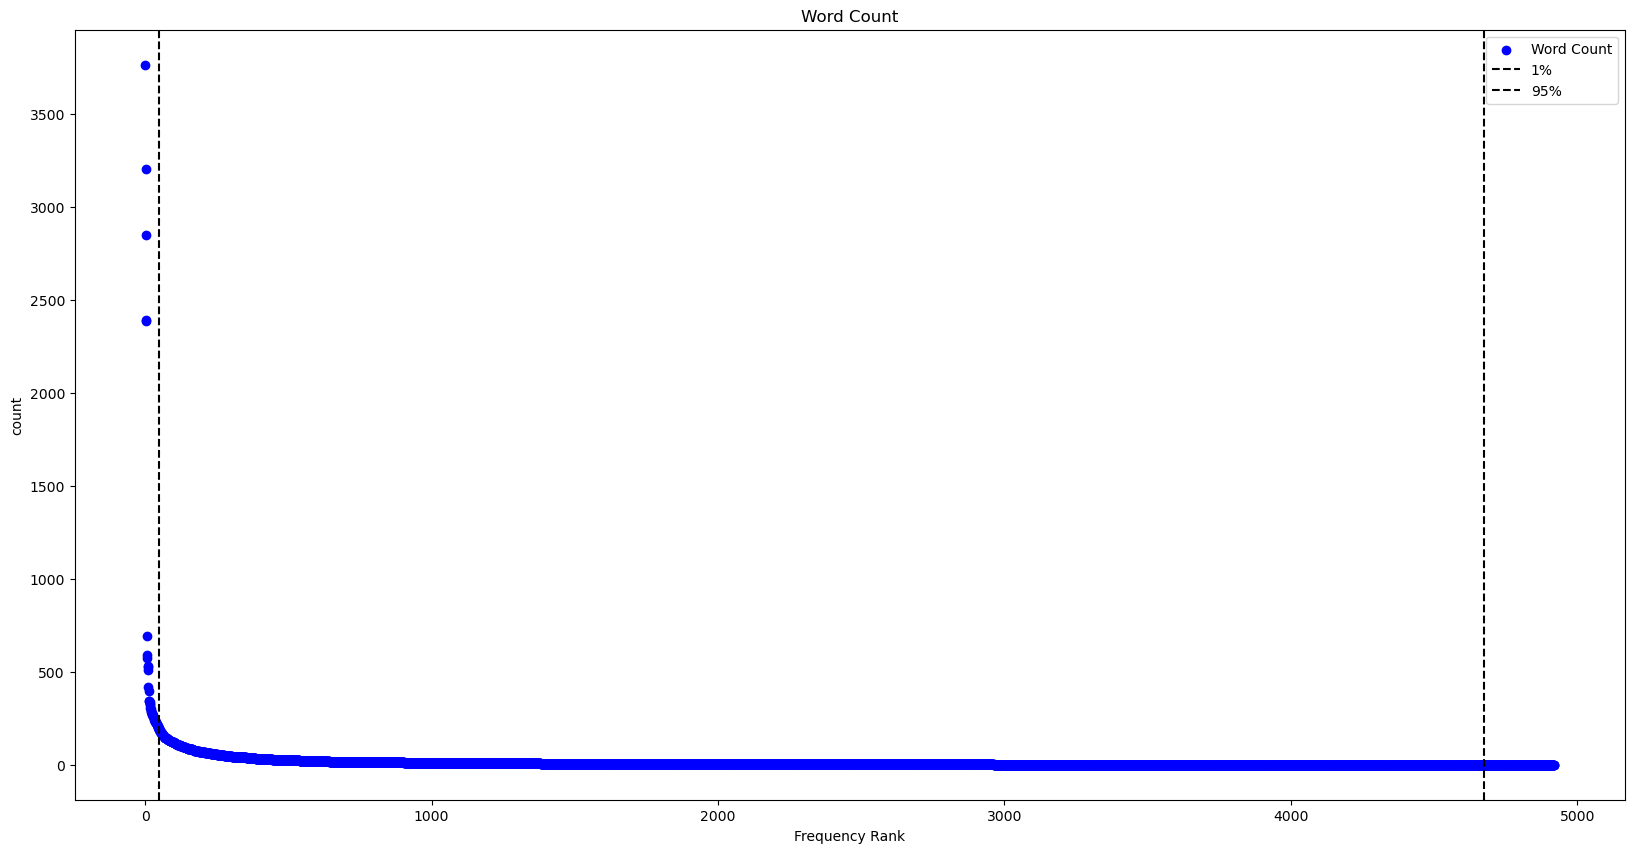

In [49]:
#Plot Scatter 
plotCount =1
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(plotCount,1,1)
ax.scatter(wordDF.index,wordDF['count'],c='b',label='Word Count')
ax.axvline(x=int(0.01*len(wordDF)),color='black',linestyle='--',label='1%')
ax.axvline(x=int(0.95*len(wordDF)),color='black',linestyle='--',label='95%')
ax.set_xlabel('Frequency Rank')
ax.set_ylabel('count')
ax.set_title('Word Count')
ax.legend()

In [50]:
#Calculate the highest idf words
tfIdfDF=pd.DataFrame.from_dict(idfDict,orient='index')
tfIdfDF.columns=['tfIdf']
tfIdfDF.sort_values(by=['tfIdf'],inplace=True)
tfIdfDF.reset_index(inplace=True)
print(tfIdfDF.head(50))
print('='*125)
print(tfIdfDF.tail(20))
removeWords=tfIdfDF['index'].iloc[:10]
print(removeWords)


        index      tfIdf
0         NUM   2.194372
1    customer   2.541114
2         and   2.714980
3       agent   3.007175
4        that   3.453141
5      really  10.729600
6         are  12.724858
7         get  13.226824
8        time  13.685714
9         one  14.421505
10        got  14.836283
11       like  17.194872
12       good  18.124324
13       know  20.570552
14       went  20.826087
15        day  21.986885
16       work  22.279070
17         oh  22.428094
18      going  23.447552
19         go  23.864769
20        yes  24.122302
21       well  24.297101
22      would  25.401515
23      think  26.093385
24       back  27.483607
25     friend  28.415254
26        car  28.658120
27        new  29.937500
28       felt  30.071749
29        sad  30.071749
30  surprised  30.621005
31        lot  30.761468
32         as  30.903226
33      great  30.903226
34       hope  31.336449
35     people  31.781991
36     always  32.396135
37    excited  32.712195
38       much  33.198020


In [51]:
#Subset of words that occur more than 3 times and aren't NUM
sentDF['smallTokens']=sentDF['tokens'].map(lambda x: [y for y in x 
                                                     if (wfDict[y]>=3)&(y!='NUM')&(len(y)>1)])
print(len(sentDF))

6706


In [52]:
#Subset of any sentences that are not long enough
sentDF=sentDF[sentDF['smallTokens'].map(lambda x: len(x))>0].reset_index(drop=True)
print(len(sentDF))

6706


In [53]:
# Get Small Vocab list 
smallVocab=list(set([y for x in sentDF['smallTokens'].tolist() for y in x]))
print(len(smallVocab))

2961


In [54]:
#Define function to return idfVector for list of tokens
def tfIdfVectorizer(tokenList,vocab,idfDict):
    #Create counter
    tfDict={}
    #Calculate word counts
    for token in tokenList:
        try:
            tfDict[token]+=1
        except:
            tfDict[token]=1
    #Calculate idf
    tfIdfVec=np.zeros(len(vocab))
    for i,x in enumerate(vocab):
        try:
            #calculate log normalize tf
            tf=np.log(1.0+tfDict[x])
            #Calculate smoothed idf
            idf = np.log(1.0+idfDict[x])
            tfIdfVec[i]=tf*idf
        except KeyError:
            pass
    return tfIdfVec

In [55]:
#Test on first set of tokens - delete this 
startTime=time.time()
testTokens=sentDF['smallTokens'].iloc[0]
print(testTokens)
print('='*125)
for x in testTokens:
    print('%s: smoothed tf-idf=%.2f'%(x,np.log(1.0+idfDict[x])*np.log(2.0)))
testVec=tfIdfVectorizer(testTokens,smallVocab,idfDict)
print('='*125)
for i,x in enumerate(smallVocab):
    if testVec[i]!=0.0:
        print('%s: smoothed tf-idf=%.2f'%(x,testVec[i]))
print(time.time()-startTime)

['situation', 'empathetic', ' NUM', 'remember', 'going', 'fireworks', 'best_friend']
situation: smoothed tf-idf=3.37
empathetic: smoothed tf-idf=5.35
 NUM: smoothed tf-idf=0.81
remember: smoothed tf-idf=2.97
going: smoothed tf-idf=2.22
fireworks: smoothed tf-idf=4.51
best_friend: smoothed tf-idf=3.80
remember: smoothed tf-idf=2.97
empathetic: smoothed tf-idf=5.35
 NUM: smoothed tf-idf=0.81
best_friend: smoothed tf-idf=3.80
fireworks: smoothed tf-idf=4.51
going: smoothed tf-idf=2.22
situation: smoothed tf-idf=3.37
0.0068509578704833984


In [56]:
#Train word to vector model
startTime=time.time()
wvDim=100
w2Model=gensim.models.Word2Vec(sentDF['smallTokens'].tolist(),
                              vector_size=wvDim, window=3, min_count=3,workers=40,epochs=500,sg=1,seed=0)
runTime=(time.time()-startTime)/60.0
print('Runtime (in mins)'+str(runTime))

Runtime (in mins)1.9792946060498555


In [57]:
def avgW2V(xList):
    vecList=[]
    for x in xList:
        try:
            vecList.append(w2Model.wv[x])
        except KeyError:
            pass
    return np.mean(vecList,axis=0)

In [58]:
#Calculate average word2vec for sentences
startTime=time.time()
sentW2V=np.asarray(list(map(avgW2V,sentDF['smallTokens'].tolist())))
print(sentW2V.shape)
print('Runtime in %.2f minutes'%((time.time()-startTime)/60.0))

(6706, 100)
Runtime in 0.00 minutes


In [59]:
# Define function to generate glove array
#def muGlove(tokenlist, glove=glove):
#    mulist = []
#    for token in tokenlist:
#        try:
#            mulist.append(glove[token])
#       except KeyError:
#            pass
#    return np.mean(mulist, axis=0)

In [60]:
import warnings
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans

# Time
maxClusters = 50
iRange = range(1, maxClusters + 1)

# Reduce dimensionality with PCA
pca = PCA(n_components=50)  # Adjust the number of components as needed
sentW2V_reduced = pca.fit_transform(sentW2V)

# Set batch_size to prevent memory leak
batch_size = max(4096, len(sentW2V_reduced) // 10)

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", message="MiniBatchKMeans is known to have a memory leak")
    ssdList = []
    for cCount in iRange:
        # Use MiniBatchKMeans with parallelization
        kmeans = MiniBatchKMeans(n_clusters=cCount, random_state=0, n_init=10, max_iter=100, batch_size=batch_size)
        kmeans.fit(sentW2V_reduced)
        ssdList.append(kmeans.inertia_)

# %%Time
#maxClusters=50
#iRange=range(1,maxClusters+1)
#ssdList = [KMeans(cCount,random_state=0).fit(sentW2V).inertia_
#               for cCount in iRange]
#import warnings
#from sklearn.cluster import KMeans

## Time
#maxClusters = 50
#iRange = range(1, maxClusters + 1)

#with warnings.catch_warnings():
#    warnings.simplefilter("ignore", category=FutureWarning)
#    ssdList = [KMeans(cCount, n_init=10, random_state=0).fit(sentW2V).inertia_
#               for cCount in iRange]

In [1]:
plt.plot(iRange,ssdList)
plt.xlabel('Number of Clusters',fontsize=12)
plt.ylabel('Sum Squared Distane',fontsize=12)
plt.title('Sum Squared Distance by Number of Clusters',fontsize=16)

NameError: name 'plt' is not defined

In [62]:
#Perform clustering 
startTime=time.time()
kmX=KMeans(20,random_state=0)
kmX.fit(sentW2V)
sentDF['cluster']=kmX.predict(sentW2V)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [63]:
sentDF.head()

,pk,sentence,tokens,smallTokens,cluster
0,C:/Users/conne_0hfce1v/OneDrive/Desktop/NLP/Mo...,",Situation,emotion,empathetic_dialogues,labels...","[situation, emotion, empathetic, dialogues, la...","[situation, empathetic, NUM, remember, going,...",15
1,C:/Users/conne_0hfce1v/OneDrive/Desktop/NLP/Mo...,"There was a lot of people, but it only felt li...","[lot, people, felt, like, us, world]","[lot, people, felt, like, us, world]",1
2,C:/Users/conne_0hfce1v/OneDrive/Desktop/NLP/Mo...,""",sentimental,""Customer :I remember going to s...","[sentimental, customer, remember, going, see, ...","[sentimental, customer, remember, going, see, ...",15
3,C:/Users/conne_0hfce1v/OneDrive/Desktop/NLP/Mo...,It was the first time we ever spent time alone...,"[first, time, ever, spent, time, alone, together]","[first, time, ever, spent, time, alone, together]",3
4,C:/Users/conne_0hfce1v/OneDrive/Desktop/NLP/Mo...,"Although there was a lot of people, we felt li...","[although, lot, people, felt, like, people, wo...","[although, lot, people, felt, like, people, wo...",1


In [64]:
sentW2VDF=pd.DataFrame(sentW2V,columns=['wvDim%i' for i in range(sentW2V.shape[1])])
sentW2VDF['pk']=sentDF['pk'].values

In [65]:
len(sentDF)

6706

In [70]:
#Define analysis function
def tfIdfAnalysis(xDF,clusterCol,noPrint=[],nWords=10,topSentences=3,verbose=False):
    clusters=xDF[clusterCol].drop_duplicates().sort_values().tolist()
    #Calcuate tf-idf for dataframe
    tfIdfVals=np.asarray(list(map(lambda x: tfIdfVectorizer(x,smallVocab,idfDict),
                                 xDF['smallTokens'].tolist())))
    wordAgg=np.sum(tfIdfVals,axis=0)
    wordAgg=[[smallVocab[i],x]for i,x in enumerate(wordAgg)]
    wordAgg.sort(key=lambda x: x[1])
    if verbose:
        print('='*125)
        print('Total')
        print('Top %i Words'%nWords)
        for X in wordAgg[-nWords:][::-1]:
            print(x)
    #Calculate tf -idf for each word
    clusterDict={}
    for cluster in clusters:
        if len(xDF[xDF[clusterCol]==cluster])>0:
            if len(xDF['smallTokens'][xDF[clusterCol]==cluster])>0:
                tfIdfVals=np.asarray(list(map(lambda x: tfIdfVectorizer(x,smallVocab,idfDict),
                                             xDF['smallTokens'][xDF[clusterCol]==cluster].tolist())))
                wordAgg=np.sum(tfIdfVals,axis=0)
                wordAgg=[[smallVocab[i],x] for i,x in enumerate(wordAgg)]
                wordAgg.sort(key=lambda x: x[1])
                printVals=[x for x in wordAgg if x[0] not in noPrint][-nWords:]
                clusterDict[cluster]=[x[0] for x in printVals][::-1]
                if verbose:
                    prit('='*125)
                    print(cluster)
                    print('Top %i Words'%nWords)
                    for x in wordAgg[-nWords:][::-1]:
                        if x[1]!=0.0:
                            print(x)
                    print('='*125)
    #Create dataframe of top n words
    cDF=pd.DataFrame.from_dict(clusterDict,orient='index')
    cDF.columns=['word%i'%i for i in range(nWords)]
    cDF.reset_index(inplace=True)
    cDF.rename(columns={'index':'clusterId'},inplace=True)
    
    #Calculate population of each cluster
    countDF=xDF[[clusterCol,'pk']].groupby([clusterCol]).count().reset_index()
    countDF.columns=['clusterId','count']
    cDF=pd.merge(cDF,countDF,how='left',on=['clusterId'])
    
    return cDF


In [71]:
%%time
##test function
clusterCol='cluster'
printDF=tfIdfAnalysis(sentDF.copy(),clusterCol,noPrint=[],nWords=10,topSentences=3,verbose=False)

CPU times: total: 9.59 s
Wall time: 12.1 s


In [72]:
printDF.head()

,clusterId,word0,word1,word2,word3,word4,word5,word6,word7,word8,word9,count
0,0,go,vacation,NUM,trip,going,excited,weekend,family,customer,today,316
1,1,that,agent,customer,sorry_hear,sad,and,lonely,oh,NUM,really,728
2,2,old,NUM,brother,and,older,sounded_like,gotten,promotion,getting,that,258
3,3,one,NUM,and,time,wanted,that,girl,agent,met,customer,424
4,4,afraid,terrified,scared,customer,scary,and,NUM,agent,almost,that,348


In [74]:
sentDF.head()

,pk,sentence,tokens,smallTokens,cluster
0,C:/Users/conne_0hfce1v/OneDrive/Desktop/NLP/Mo...,",Situation,emotion,empathetic_dialogues,labels...","[situation, emotion, empathetic, dialogues, la...","[situation, empathetic, NUM, remember, going,...",15
1,C:/Users/conne_0hfce1v/OneDrive/Desktop/NLP/Mo...,"There was a lot of people, but it only felt li...","[lot, people, felt, like, us, world]","[lot, people, felt, like, us, world]",1
2,C:/Users/conne_0hfce1v/OneDrive/Desktop/NLP/Mo...,""",sentimental,""Customer :I remember going to s...","[sentimental, customer, remember, going, see, ...","[sentimental, customer, remember, going, see, ...",15
3,C:/Users/conne_0hfce1v/OneDrive/Desktop/NLP/Mo...,It was the first time we ever spent time alone...,"[first, time, ever, spent, time, alone, together]","[first, time, ever, spent, time, alone, together]",3
4,C:/Users/conne_0hfce1v/OneDrive/Desktop/NLP/Mo...,"Although there was a lot of people, we felt li...","[although, lot, people, felt, like, people, wo...","[although, lot, people, felt, like, people, wo...",1
